<a href="https://colab.research.google.com/github/RupeshSharma14/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [91]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [92]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (13, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [93]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# Loading the dataset in pandas 

path = "/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv"
bike_df = pd.read_csv(path, encoding = "latin")

In [95]:
# Displaying the dataset

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [96]:
# Size of the data

bike_df.shape

(8760, 14)

In [97]:
# Check for duplicate data

bike_df.duplicated().sum()

0

In [98]:
# Check for NULL values

bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [99]:
# Check for data types

bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object



> **Date is an object data type. We should convert it into datetime datatype.**



In [100]:
# Converting the data type of "Date" column to datetime object

bike_df["Date"] = bike_df["Date"].astype("datetime64")

In [101]:
# bike_df['year'] = bike_df['Date'].dt.year

# bike_df['month'] = bike_df['Date'].dt.month

# bike_df['day'] = bike_df['Date'].dt.day

In [102]:
# Dropping "Date" column

bike_df.drop(columns = "Date", inplace = True)

In [103]:
# Descriptive summary of the dataset

bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Exploratory Data Analysis**

### **Univariate Analysis**

**1. Dependent Variable**

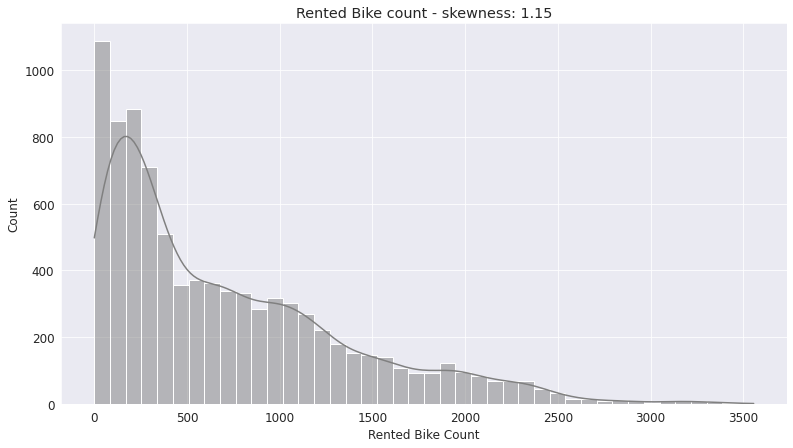

In [104]:
# Distribution of Dependent Variable

sns.histplot(bike_df["Rented Bike Count"], kde = "True", color = "grey")
plt.title("Rented Bike count - skewness: " + str(round(bike_df["Rented Bike Count"].skew(), 2))) 
plt.show()



> **The dependent variable is moderately positive skewed.**



**2. Numerical variables**

In [105]:
numeric_features = bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

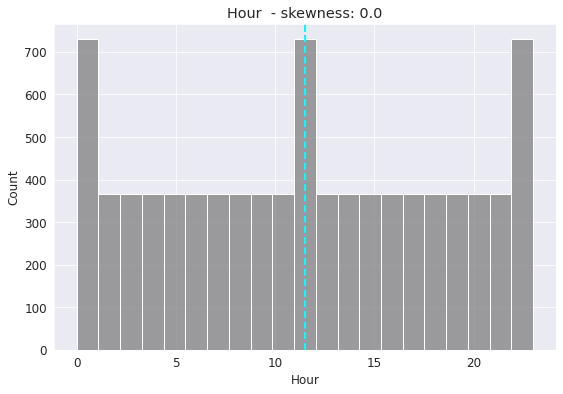

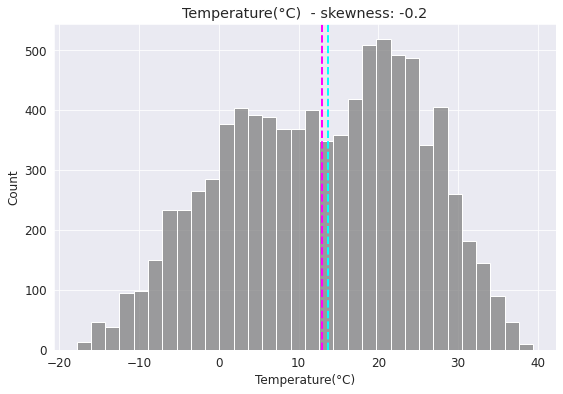

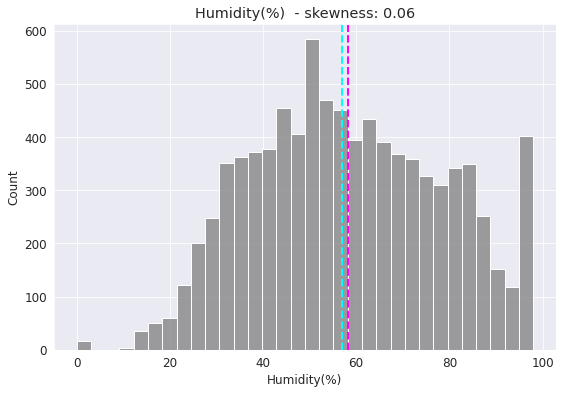

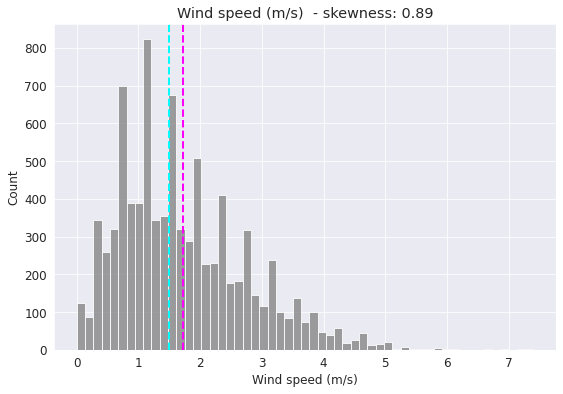

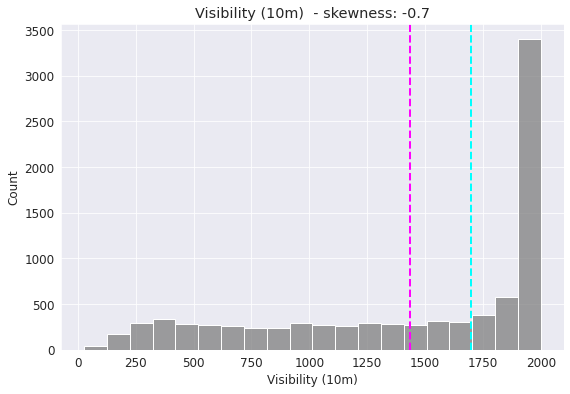

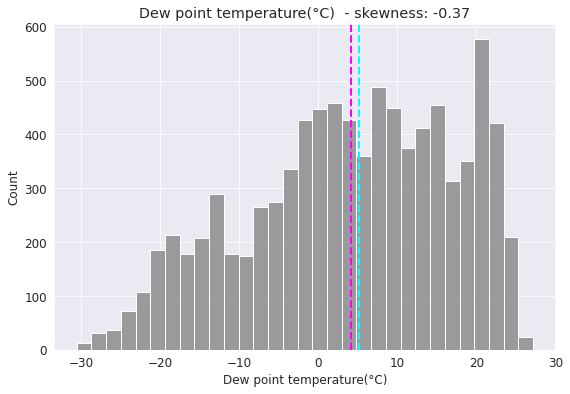

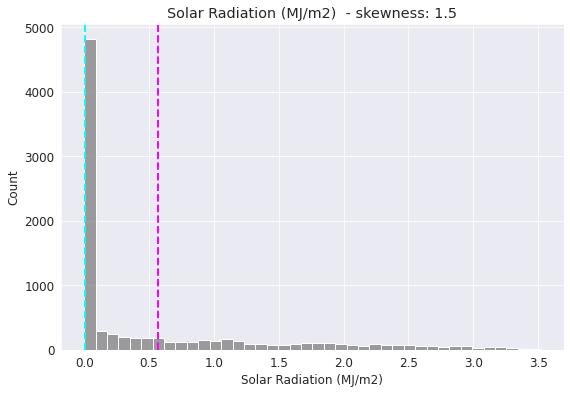

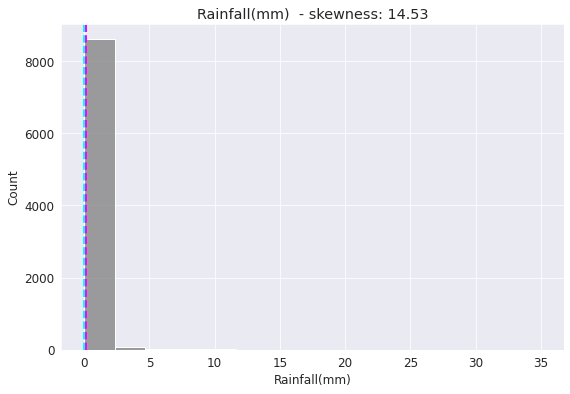

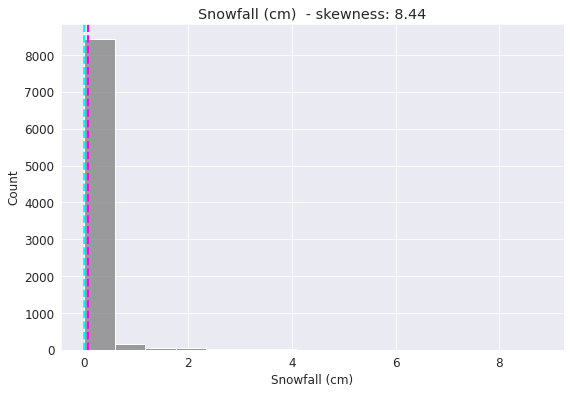

In [106]:
# Distribution of numeric_features

for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  sns.histplot(feature, ax = ax, color = "grey")
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col + "  - skewness: " + str(round(feature.skew(), 2))) 

plt.show()

**From above distributions we can conclude the following:**

> **Hour, Humidity, Temperature and Dew point follows a normal distributions.**

> **Visibility follows a moderately  negative skewed distribution.**

> **Rainfall, Snowfall, Solar Radiation and Wind Speed follows a highly positive skewed distribution.**







**3. Categorical variables**

In [107]:
# Categorical features

categorical_features = bike_df.describe(include = "object").columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

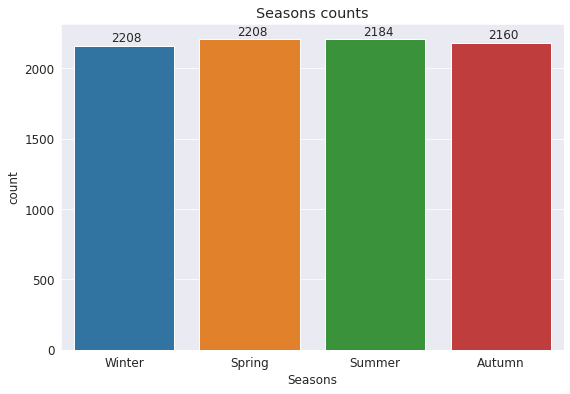

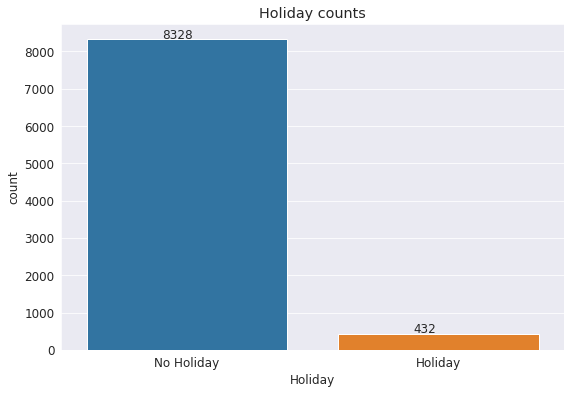

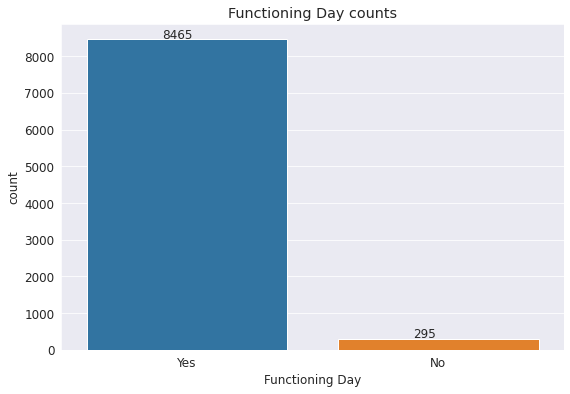

In [108]:
for col in categorical_features:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  ax = sns.countplot(x = feature)
  for p, label in zip(ax.patches, feature.value_counts().values):
    ax.annotate(label, (p.get_x()+0.300, p.get_height()+ 30))
  ax.set_title(col + " counts")

plt.show()

**From the above visualizations we can conclude the following:**


> **There is equal representation of every season in the dataset.**

> **There is only 4.93% representation of holidays in the dataset.**

> **There is only 3.3% representation of Non functioning days in the dataset.**

## **Bivariate Analysis**

**1. Numerical variables vs Dependent Variable**

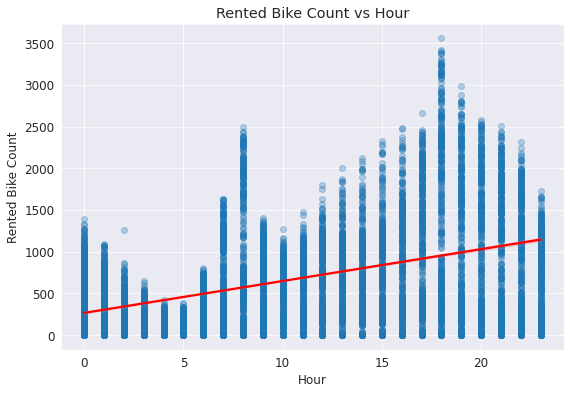

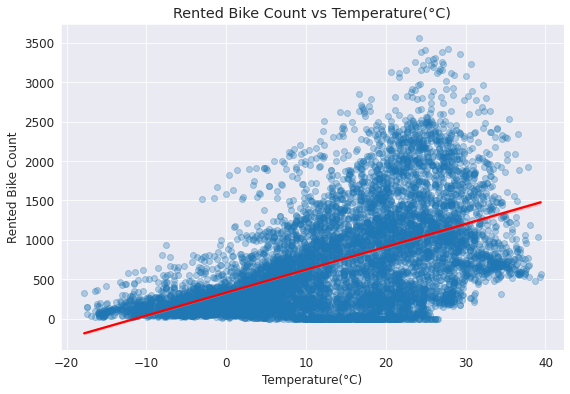

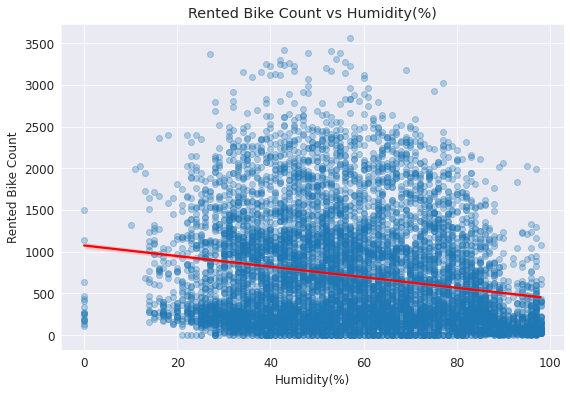

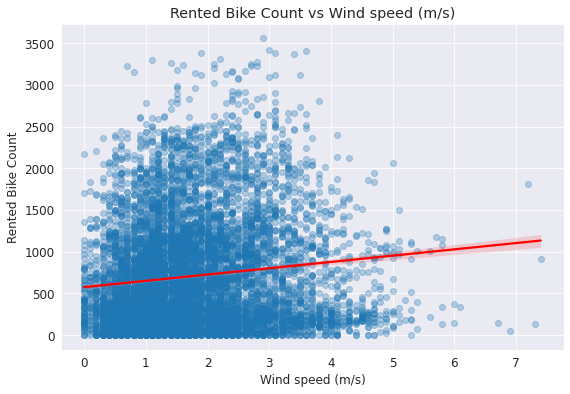

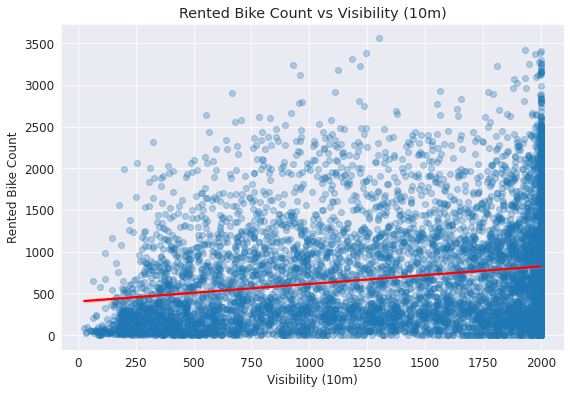

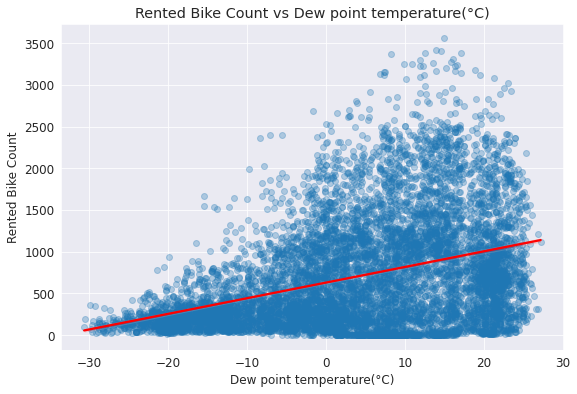

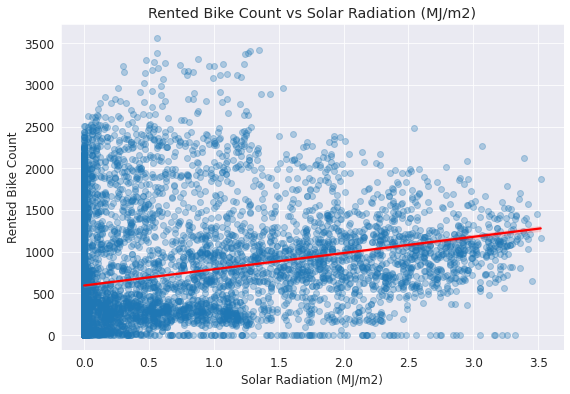

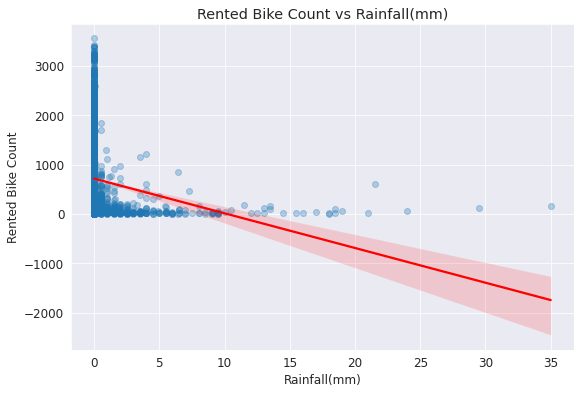

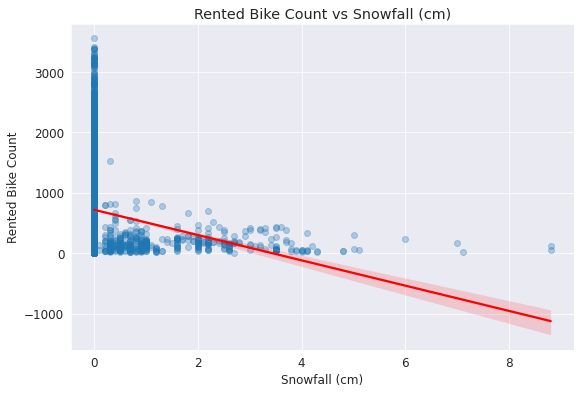

In [109]:
# Check for linear relationship between dependent and numerical independent variables

for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  label = bike_df["Rented Bike Count"]
  correlation = feature.corr(label)
  sns.regplot(x = feature, y = label, line_kws={"color": "red"}, scatter_kws={'alpha':0.3})
  ax.set_title("Rented Bike Count vs " + col)

plt.show()

**From the above visualizations we can conclude the following:**


> **Yet to conclude??**



**2. Categorical variables vs Dependent variable**



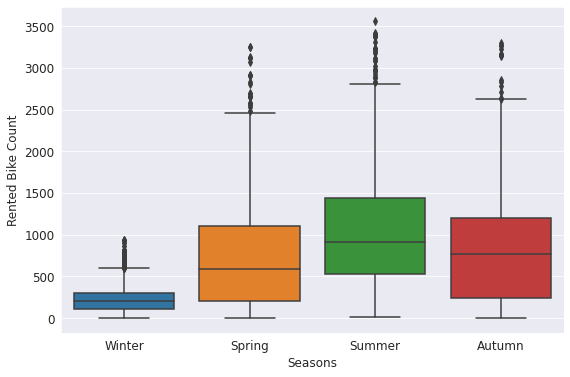

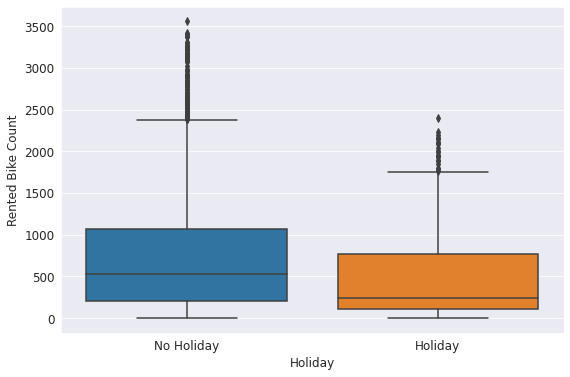

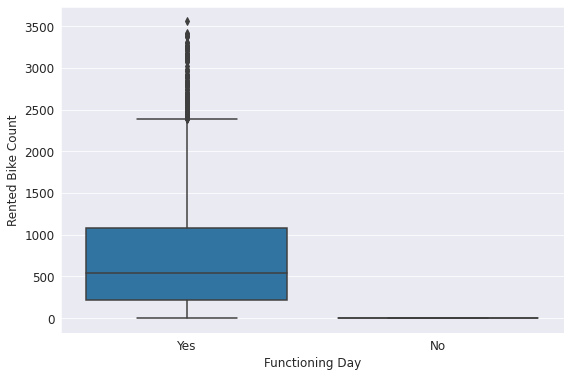

In [110]:
# Check for relation between rented bike count and categorical columns

for col in categorical_features:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bike_df[col]
  label = bike_df["Rented Bike Count"]
  sns.boxplot(x = feature, y = label)

plt.show()

**From the above visualizations following conclusions can be made:**


> **There is a high demand of bike in Summer and Autumn season while low demand in Winter seasons.**


> **The bike demand is very low on holidays.**


> **Bike demand is almost neglibile on non-functioning days.**







## **Multivariate Analysis**

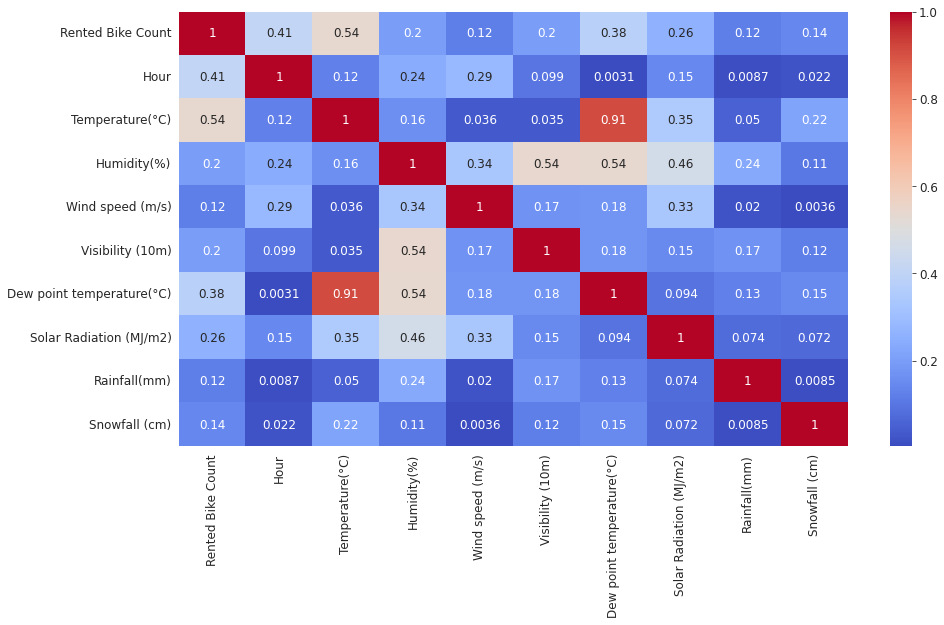

In [111]:
# Correlation matrix

plt.figure(figsize = (15, 8))
correlation = bike_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")

plt.show()

**From the above visualization we can draw the following conclusions:**

> **It seems hour and temperature affect the demand of bikes.**


> **Multicollinearity is present in the data.**





# **Data Preparation**

## **Removing Multicollinearity**

In [112]:
# Using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

In [113]:
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count", "Dew point temperature(°C)"]]])

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [114]:
numeric_features = cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in ["Rented Bike Count", "Dew point temperature(°C)"]]])["variables"].values

In [115]:
numeric_features

array(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)'], dtype=object)

## **Statistical Tests**

**Pearson Correlation**

In [116]:
from scipy import stats

In [117]:
def pearson_corr(numeric_features):
  features, pearson_coefs, p_values = [], [], []
  pearson = pd.DataFrame()
  
  for feature in numeric_features:
    pearson_coef, p_value = stats.pearsonr(bike_df[feature], bike_df["Rented Bike Count"])
    pearson_coefs.append(round(pearson_coef, 2))
    p_values.append(p_value)
  
  pearson["features"] = numeric_features
  pearson["pearson_coeff"] = pearson_coefs
  pearson["p-value"] = p_value
    
  return pearson

In [118]:
pearson_df = pearson_corr(numeric_features)
pearson_df

,features,pearson_coeff,p-value
0,Hour,0.41,1.398012e-40
1,Temperature(°C),0.54,1.398012e-40
2,Humidity(%),-0.20,1.398012e-40
3,Wind speed (m/s),0.12,1.398012e-40
4,Visibility (10m),0.20,1.398012e-40
5,Solar Radiation (MJ/m2),0.26,1.398012e-40
6,Rainfall(mm),-0.12,1.398012e-40
7,Snowfall (cm),-0.14,1.398012e-40


**ANOVA**

In [119]:
anova_df= bike_df[["Seasons", "Rented Bike Count"]].groupby(["Seasons"])

f_value, p_value = stats.f_oneway(anova_df.get_group("Winter")["Rented Bike Count"], anova_df.get_group("Spring")["Rented Bike Count"],
                              anova_df.get_group("Summer")["Rented Bike Count"], anova_df.get_group("Autumn")["Rented Bike Count"]) 

anova_test_df = pd.DataFrame({"features": "Seasons", "f-value": [round(f_value, 2)], "p-value": [p_value]})
anova_test_df   

,features,f-value,p-value
0,Seasons,776.47,0.0


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance.

**Two-sample t-test**

In [120]:
def t_test(features):
  t_values, p_values = [], []
  t_test_df = pd.DataFrame()

  for i in range(len(features)):
    unq_val = bike_df[features[i]].unique()
    ttest_df = bike_df[[features[i], "Rented Bike Count"]].groupby([features[i]])
    t_value, p_value = stats.ttest_ind(ttest_df.get_group(unq_val[0])["Rented Bike Count"], ttest_df.get_group(unq_val[1])["Rented Bike Count"])
    t_values.append(round(t_value, 2))
    p_values.append(p_value)
  
  t_test_df["features"] = features
  t_test_df["t-value"] = t_values
  t_test_df["p-value"] = p_values

  return t_test_df

In [121]:
t_test_df = t_test(["Holiday", "Functioning Day"])
t_test_df

,features,t-value,p-value
0,Holiday,6.79,1.215644e-11
1,Functioning Day,19.50,6.732211e-83


**All three categorical features are important.**

In [125]:
sel_cols = ["Rented Bike Count", "Hour", "Temperature(°C)", "Humidity(%)", "Visibility (10m)", "Solar Radiation (MJ/m2)", "Seasons",	"Holiday", "Functioning Day"]

In [126]:
sel_bike_df = bike_df[sel_cols]
sel_bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2000,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,2000,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,2000,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,2000,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2000,0.0,Winter,No Holiday,Yes


## **Splitting the dataset**

In [127]:
# Random Sampling

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(sel_bike_df, test_size = 0.2, random_state = 42)

In [128]:
bike_count = np.sqrt(train_set["Rented Bike Count"].copy())      
features = train_set.drop("Rented Bike Count", axis = 1)

In [129]:
cat_cols = features.describe(include=['O']).columns
cat_features = features[cat_cols]
cat_features.head()

,Seasons,Holiday,Functioning Day
8415,Autumn,No Holiday,Yes
5049,Summer,No Holiday,Yes
8395,Autumn,No Holiday,Yes
1535,Winter,No Holiday,Yes
5518,Summer,No Holiday,Yes


In [130]:
num_cols = features.describe().columns
num_features = features[num_cols]
num_features.head()

,Hour,Temperature(°C),Humidity(%),Visibility (10m),Solar Radiation (MJ/m2)
8415,15,13.2,61,719,1.03
5049,9,22.9,86,538,0.76
8395,19,11.2,46,869,0.00
1535,23,-2.6,69,1434,0.00
5518,22,27.2,73,1005,0.00


In [131]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataTransformer(BaseEstimator, TransformerMixin):

  def __init__(self):
    pass

  def fit(self, X, y = None):
    return self
  
  def transform(self, X, y = None):
    features = X.describe().columns
    for feature in features:

      if  -0.5 <= X[feature].skew() <= 0.5:       # Symmetrical Distribution
        pass

      elif -1 <= X[feature].skew() < -0.5:         # Moderately negative skewed distribution
        X[feature] = np.sqrt(np.max(X[feature] + 1) - X[feature])
      
      elif 0.5 < X[feature].skew() <= 1:           # Moderately positive skewed distribution
        X[feature] = np.sqrt(X[feature])

      elif X[feature].skew() > 1:                 # Highly positive skewed distribution
        X[feature] = np.log10(X[feature] + 1)

      else:                                       # Highly negative skewed distribution
        X[feature] = np.log10(max(X[feature] + 1) - X[feature])
    
    return X

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ("data_transform", DataTransformer()),
                         ("std_scaler", StandardScaler())                        
])

In [133]:
''' Using Column Transformer to create a pipeline to use StandardScaler to perform feature scaling on num features and also
converting categorical features into numerical features using OneHot Encoder'''

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

features_pipeline = ColumnTransformer([
                                       ("num", num_pipeline, num_cols),
                                       ("cat", OneHotEncoder(), cat_cols)
])

data_prepared = features_pipeline.fit_transform(features)

In [134]:
data_prepared

array([[ 0.50542093,  0.02237011,  0.13701177, ...,  1.        ,
         0.        ,  1.        ],
       [-0.36356579,  0.83822207,  1.35998213, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.08474541, -0.14584679, -0.59677044, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.36058981,  1.39333784,  0.18593058, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.22957653, -1.37383015, -0.35217637, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.51923877,  0.53543165, -0.15650112, ...,  1.        ,
         0.        ,  1.        ]])

In [135]:
data_prepared.shape

(7008, 13)

In [136]:
bike_count.shape

(7008,)

In [137]:
test_bike_count = np.sqrt(test_set["Rented Bike Count"].copy())
test_data = test_set.drop("Rented Bike Count", axis = 1)

test_data_prepared = features_pipeline.transform(test_data)

# **Modelling**

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [139]:
def fit_models(models_dict, data_prepared, label_prepared):

  train_models = dict()
  for model in models_dict:
    train_models[model] = models_dict[model].fit(data_prepared, label_prepared)

  return train_models

In [140]:
from numpy.core.fromnumeric import mean
def evaluate_models(models_dict, data_prepared, label_prepared, cross_val = False):
  
  scores_dict = dict()

  if cross_val:

    for model in models_dict:
      model_scores = cross_val_score(models_dict[model], data_prepared, 
                                     label_prepared, scoring = ("r2"), cv = 10)
      scores_dict[model] = mean(model_scores)

  else:

    for model in models_dict:
      bike_count_pred = models_dict[model].predict(data_prepared)
      scores_dict[model] = r2_score(label_prepared, bike_count_pred)

  return scores_dict

In [141]:
# Model training

models_dict = {"LR": LinearRegression(), "KNN": KNeighborsRegressor(),
               "DT": DecisionTreeRegressor(), "RF": RandomForestRegressor(),
               "ABR": AdaBoostRegressor(), "GBR": GradientBoostingRegressor()}
               
trained_models = fit_models(models_dict, data_prepared, bike_count)

In [142]:
# Model evaluation on train-set

evaluate_models(models_dict, data_prepared, bike_count)

{'ABR': 0.6984455367206536,
 'DT': 0.9994726887849487,
 'GBR': 0.8726241264241017,
 'KNN': 0.8974701703997681,
 'LR': 0.6358279428522022,
 'RF': 0.9824346352775041}

In [143]:
# Model evaluation on cross validation 

evaluate_models(models_dict, data_prepared, bike_count, cross_val = True)

{'ABR': 0.6851511973684594,
 'DT': 0.7653735528349946,
 'GBR': 0.8609838096991952,
 'KNN': 0.8348431183487609,
 'LR': 0.634111405331982,
 'RF': 0.8772611654918366}

In [144]:
# searching for the best parameters of the model using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_estimators": stats.randint(low = 50, high = 1000),
    "max_features": stats.randint(low = 1, high = 13),
}

forest_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                                cv = 10, scoring = "r2", random_state = 42)
rnd_search.fit(data_prepared, bike_count)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5b1f458cd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5b1f4583d0>},
                   random_state=42, scoring='r2')

In [147]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=380, random_state=42)

In [148]:
predictions = rnd_search.best_estimator_.predict(test_data_prepared)

# predictions = trained_models["RF"].predict(test_data_prepared)

r2_score(test_bike_count, predictions)

0.8782379131136988

In [ ]:
# # Grid Search

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "n_estimators": [870, 890, 930],
#     "max_features": [5]
# }


# reg = RandomForestRegressor()

# grid_search = GridSearchCV(reg, param_grid, cv = 10, scoring = "r2", return_train_score = True, refit = True)
# grid_search.fit(data_prepared, bike_count)

In [ ]:
# grid_search.best_estimator_

In [ ]:
# predictions = grid_search.best_estimator_.predict(test_data_prepared)

# r2_score(test_bike_count, predictions)

In [158]:
imp_features_forest = rnd_search.best_estimator_.feature_importances_
cat_encoder = features_pipeline.named_transformers_["cat"]

cat_attribs = cat_encoder.categories_
cat_attribs
attributes_forest = []
attributes_forest.extend(num_cols)
for var in cat_attribs:
  attributes_forest.extend(var)

attributes_forest

sorted(zip(imp_features_forest, attributes_forest), reverse = True)

[(0.25292570239059503, 'Hour'),
 (0.24003031722578366, 'Temperature(°C)'),
 (0.145380841976678, 'Humidity(%)'),
 (0.08161176890784959, 'Yes'),
 (0.07978608556018366, 'No'),
 (0.07407006170742542, 'Winter'),
 (0.053021131256457917, 'Solar Radiation (MJ/m2)'),
 (0.04399189790967842, 'Visibility (10m)'),
 (0.013115954293167642, 'Autumn'),
 (0.007356246204631977, 'Spring'),
 (0.003994262868717287, 'Summer'),
 (0.00242560510022271, 'No Holiday'),
 (0.002290124598608722, 'Holiday')]